# Installing Net2Brain

In [1]:
!pip install -U git+https://github.com/cvai-roig-lab/Net2Brain

  Cloning https://github.com/cvai-roig-lab/Net2Brain to /private/var/folders/7f/b6wv12k16l725f7qh0gv_8g40000gn/T/pip-req-build-mqpm7mpq
  Running command git clone --filter=blob:none --quiet https://github.com/cvai-roig-lab/Net2Brain /private/var/folders/7f/b6wv12k16l725f7qh0gv_8g40000gn/T/pip-req-build-mqpm7mpq
  Resolved https://github.com/cvai-roig-lab/Net2Brain to commit 885e3b1e7359f095129bdd9e8268c3ce0dcf135b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/7f/b6wv12k16l725f7qh0gv_8g40000gn/T/pip-install-wjsxybm1/clip_c8e12cb27cc7418d8e3c4d9de23663c2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/7f/b6wv12k16l725f7qh0gv_8g40000gn/T/pip-install-wjsxybm1/clip_c8e12cb27cc7418d8e3c4d9de23663c2
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CSA

# Step 2: Creating Representational Dissimilarity Matrices (RDMs) using `RDM Creator`

After completing Step 1, where the Feature Extractor extracts features from the specified layers, we can now proceed to Step 2, which involves calculating Representational Dissimilarity Matrices (RDMs) using the RDM Creator's built-in functionality.

We first initialize the RDM Creator class, which contains the function to generate RDMs. The RDM Creator class requires the following parameters:
- **device**: The device on which the RDMs will be generated. This can be 'cpu' or 'cuda'.
- **verbose**: Whether to print the progress of the RDM generation process.

To generate RDMs, the RDM Creator function requires:

- **feature_path**: The path to the .npz files containing the layer features for each image. These files should have a [Batch x Channel x Height x Width] format.
- **save_path** (optional): The location where the generated RDMs will be saved.
- **save_format** (optional): The format in which the RDMs will be saved. This can be 'npz' or 'pt'.
- **distance** (optional): The distance function to generate the RDMs. Default is the correlation distance.
- **chunk_size** (optional): The number of images to be processed at a time. This is useful when the number of images is too large to fit in memory. Default is all images.



The function will then:

- **Output**: Create an RDM with the shape (#Images, #Images) for every specified layer.

In this example, we'll be using the AlexNet features generated earlier in the tutorial. The function can be called as follows:

In [2]:
from net2brain.rdm_creation import RDMCreator

feat_path = "AlexNet_Feat"
save_path = "AlexNet_RDM"


# Call the Class with the path to the features
creator = RDMCreator(verbose=True, device='cpu') 
save_path = creator.create_rdms(feature_path=feat_path, save_path=save_path, save_format='npz') 

Creating RDMs:   0%|          | 0/5 [00:00<?, ?it/s]

The default distance function is the correlation distance. To use a different distance function, we can specify the distance function in the **distance** parameter. The available distance functions can been seen by calling the **distance_functions** method of the RDMCreator. We created synonyms for the distance functions to make it easier to use them (i.e. l2 == euclidean). The available distance functions are:

In [3]:
creator.distance_functions()

['l2', 'euclidean', 'l1', 'manhattan', 'cosine', 'pearson', 'correlation']

You can also use custom distance functions by passing a function to the **distance** parameter. The function should take one argument `x` of shape `(N, D)`, which represents the features (dimension `D`) of the `N` images and return a pairwise distance matrix of shape `(N, N)`. For example, we can use the cosine distance function as follows:

In [4]:
import torch.nn.functional as F

def custom_cosine(x):
    x_norm = F.normalize(x, p=2, dim=1)
    return 1 - (x_norm @ x_norm.T)

creator.create_rdms(feature_path=feat_path, save_path='AlexNet_RDM_custom', save_format='npz', distance=custom_cosine)

Creating RDMs:   0%|          | 0/5 [00:00<?, ?it/s]

PosixPath('AlexNet_RDM_custom')

We can access and visualize the RDM of a single layer using the `LayerRDM` class:

RDM for layer features.0 with 10 stimuli


<Axes: title={'center': 'Layer=features.0'}>

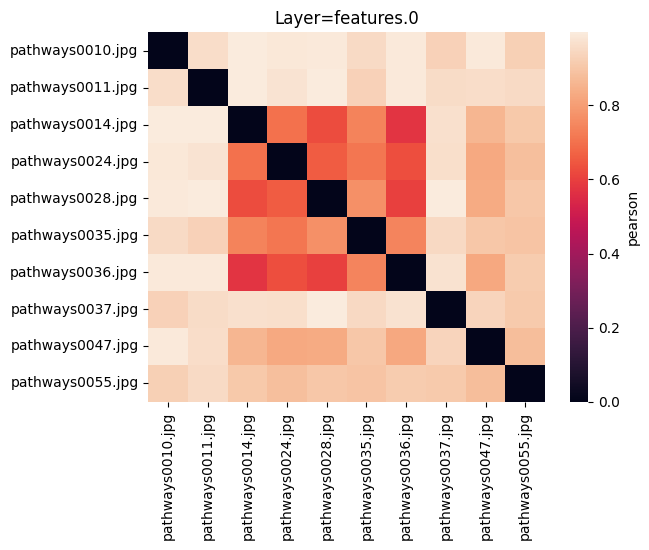

In [5]:
from net2brain.rdm_creation import LayerRDM

rdm = LayerRDM.from_file("AlexNet_RDM/RDM_features_0.npz")
print(rdm)
rdm.plot(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
from net2brain.rdm_creation import RDMCreator

feat_path = "ResNet50_Feat"
save_path = "ResNet50_RDM"


# Call the Class with the path to the feautures
creator = RDMCreator(device='cpu', verbose=True)  
creator.create_rdms(feature_path=feat_path, save_path=save_path, save_format='npz')  # This will create and save the RDMs at the specified save path

Creating RDMs:   0%|          | 0/4 [00:00<?, ?it/s]

PosixPath('ResNet50_RDM')